<a id='import-required-libraries'></a>
# <b><div style='padding:0px;background-color:white;color:#0C5679;border-radius:0px;font-size:100%;text-align: left; margin-bottom: 0px;'> MUSIC RECOMMENDATION SYSTEM </div></b>

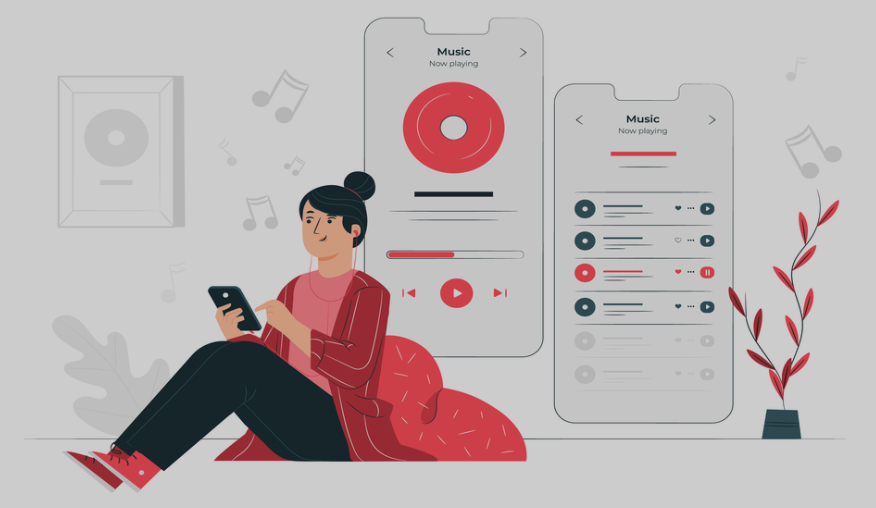

image reference : "https://www.appquokka.com/"

<a id='import-required-libraries'></a>
# <b><div style='padding:0px;background-color:white;color:#0C5679;border-radius:0px;font-size:100%;text-align: left; margin-bottom: 0px;'> Project Purpose:</div></b>
**This project aims to provide personalized music recommendations by analyzing various characteristics of musical tracks. Utilizing a comprehensive dataset that includes features such as track popularity, danceability, energy, and many others, the system recommends songs that align with users' musical preferences.**

# Preperation

## Import Required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import itertools
import plotly.graph_objects as go
from datetime import datetime
# !pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
#Adjusting Row Column Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [7]:
#Read data
df = pd.read_csv("../data/spotify/spotify_songs.csv")
df.head()

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name             playlist_id playlist_genre playlist_subgenre  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
4     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.748   0.916    6    -2.634     1        0.058         0.102   
1         0.726   0.815   11    -4.969     1        0.037         0.072   
2         0.675   0.931    1    -3.432     0        0.074         0.079   
3         0.718   0.930    7    -3.778     1        0.102         0.029   
4         0.650   0.833    1    -4.672     1        0.036         0.080   

   instrumentalness  liveness  valence   tempo  duration_ms  
0             0.000     0.065    0.518 122.036       194754  
1             0.004     0.357    0.693  99.972       162600  
2             0.000     0.110    0.613 124.008       176616  
3             0.000     0.204    0.277 121.956       169093  
4             0.000     0.083    0.725 123.976       189052

# Dataset variables

<div style="border-radius: 10px; border: solid #484366;padding: 15px; background-color: #FFECC3; font-size:100%; text-align:left">

  
**track_id:** unique ID for each music

**track_name:** Name of the track
    
**track_artist:** The artists' names who performed the track. If there is more than one artist, they are separated by a ;

**popularity:** The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity

**acousticness:** acousticness

**danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable
    
**duration_ms:** The track length in milliseconds

**energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale

**instrumentalness:** Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content

**key:** The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1
    
**liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live
    
**loudness:** The overall loudness of a track in decibels (dB)
    
**speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks
acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
    
**tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration 
    
**valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry) 
    
**music_genre:** The genre in which the track belongs

# Overview of Data

In [8]:
def check_df(dataframe, head=5):
    print('##################### Shape #####################')
    print(dataframe.shape)
    print('##################### Types #####################')
    print(dataframe.dtypes)
    print('######################## Head ########################')
    print(dataframe.head(head))
    print('################## Missing Values ##################')
    print(dataframe.isnull().sum())

check_df(df)

##################### Shape #####################
(32833, 23)
##################### Types #####################
track_id             object
track_name           object
track_artist         object
track_popularity      int64
track_album_id       object
                     ...   
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
Length: 23, dtype: object
######################## Head ########################
                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artis

In [4]:
custom_percentiles = [0.01, 0.25, 0.5, 0.75, 0.99]
description = df.describe(percentiles=custom_percentiles).T
description

count       mean       std      min         1%  \
track_popularity 32848.000     42.459    24.993    0.000      0.000   
danceability     32848.000      0.655     0.145    0.000      0.271   
energy           32848.000      0.699     0.181    0.000      0.205   
key              32848.000      5.374     3.612    0.000      0.000   
loudness         32848.000     -6.720     2.988  -46.448    -15.978   
mode             32848.000      0.566     0.496    0.000      0.000   
speechiness      32848.000      0.107     0.101    0.000      0.026   
acousticness     32848.000      0.175     0.220    0.000      0.000   
instrumentalness 32848.000      0.085     0.224    0.000      0.000   
liveness         32848.000      0.190     0.154    0.000      0.036   
valence          32848.000      0.511     0.233    0.000      0.052   
tempo            32848.000    120.880    26.908    0.000     74.431   
duration_ms      32848.000 225775.703 59851.587 4000.000 112496.290   

                        25%        50%        75%        99%        max  
track_popularity     24.000     45.000     62.000     89.000    100.000  
danceability          0.563      0.672      0.761      0.926      0.983  
energy                0.581      0.721      0.840      0.982      1.000  
key                   2.000      6.000      9.000     11.000     11.000  
loudness             -8.173     -6.166     -4.646     -1.925      1.275  
mode                  0.000      1.000      1.000      1.000      1.000  
speechiness           0.041      0.063      0.132      0.448      0.918  
acousticness          0.015      0.080      0.255      0.894      0.994  
instrumentalness      0.000      0.000      0.005      0.917      0.994  
liveness              0.093      0.127      0.248      0.801      0.996  
valence               0.331      0.512      0.693      0.961      0.991  
tempo                99.958    121.982    133.920    191.866    239.440  
duration_ms      187793.000 216000.000 253581.250 430284.020 517810.000

## Analysis of Categorical Variables

In [10]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
  # Categorical columns: Those of type 'object
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == "O"]
    
    #  Numeric-looking but actually categorical columns: Those of numeric data type with a unique value count below cat_th
    num_but_cat = [col for col in dataframe.columns if (dataframe[col].dtype != "O") and (dataframe[col].nunique() < cat_th)]

    # Columns that appear to be categorical but could actually be converted to numerical values: Those of 'object' type with a unique value count below car_th
    cat_but_car = [col for col in dataframe.columns if (dataframe[col].dtype == "O") and (dataframe[col].nunique() > car_th)]
    
    cat_cols = cat_cols + num_but_cat
    
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    
    # Numeric columns:
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    
    return cat_cols, num_cols, cat_but_car

In [11]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 32833
Variables: 23
cat_cols: 2
num_cols: 12
cat_but_car: 9
num_but_cat: 1


In [14]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

                playlist_genre  Ratio
playlist_genre                       
edm                       6043 18.405
rap                       5746 17.501
pop                       5507 16.773
r&b                       5431 16.541
latin                     5155 15.701
rock                      4951 15.079
##########################################


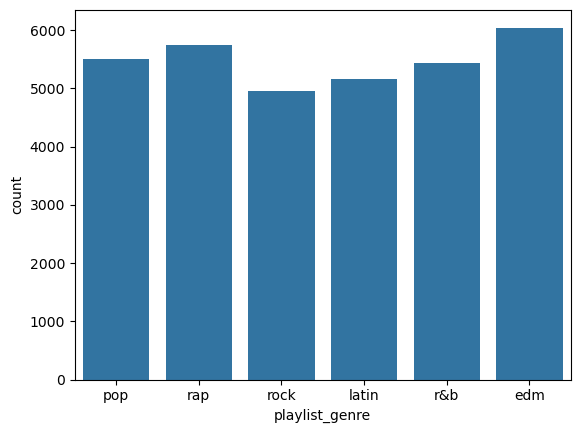

In [15]:
cat_summary(df,'playlist_genre', plot=True)

                           playlist_subgenre  Ratio
playlist_subgenre                                  
progressive electro house               1809  5.510
southern hip hop                        1675  5.102
indie poptimism                         1672  5.092
latin hip hop                           1656  5.044
neo soul                                1637  4.986
...                                      ...    ...
new jack swing                          1133  3.451
post-teen pop                           1129  3.439
permanent wave                          1105  3.366
album rock                              1065  3.244
reggaeton                                949  2.890

[24 rows x 2 columns]
##########################################


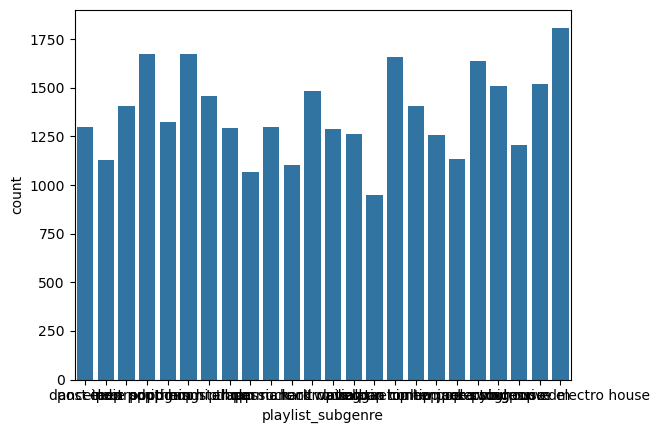

In [16]:
cat_summary(df,'playlist_subgenre', plot=True)

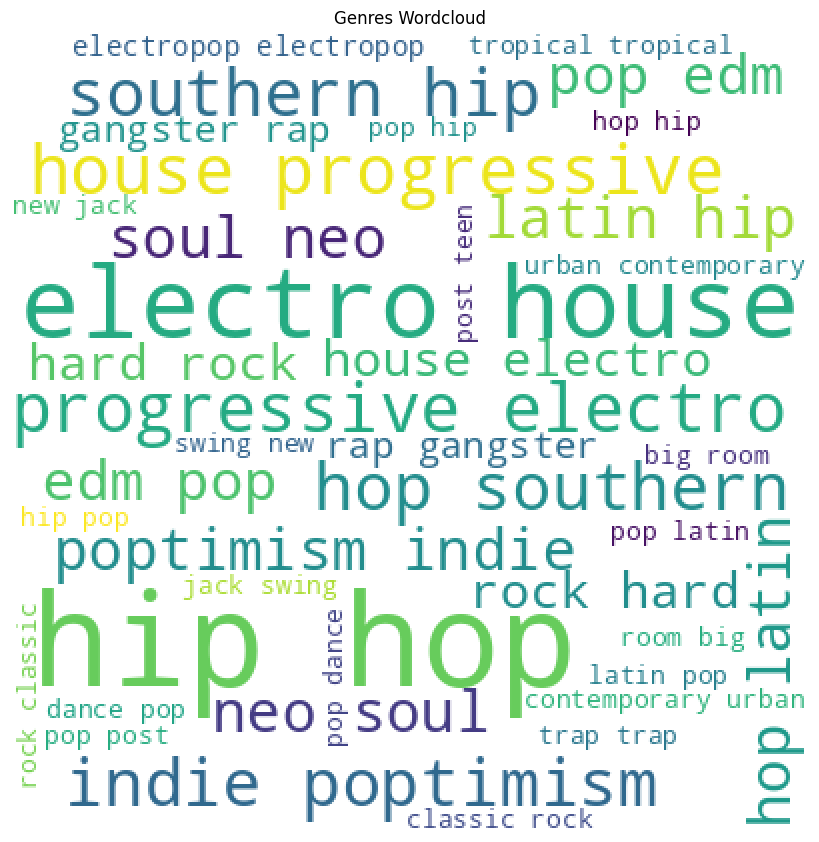

In [10]:
from wordcloud import WordCloud,STOPWORDS

stopwords = set(STOPWORDS)
comment_words = " ".join(df['playlist_subgenre'])+" "
wordcloud = WordCloud(width = 400, height = 400,
                background_color ='white',
                stopwords = stopwords,
                max_words=40,
                min_font_size = 10).generate(comment_words)
                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Genres Wordcloud")
plt.show()

## Clean the data

In [17]:
#Missing Values:
missing_tracks = df[df['track_name'].isnull() |
                           df['track_artist'].isnull() |
                           df['track_album_name'].isnull()]

print(missing_tracks)

                     track_id track_name track_artist  track_popularity  \
8151   69gRFGOWY9OMpFJgFol1u0        NaN          NaN                 0   
9282   5cjecvX0CmC9gK0Laf5EMQ        NaN          NaN                 0   
9283   5TTzhRSWQS4Yu8xTgAuq6D        NaN          NaN                 0   
19568  3VKFip3OdAvv4OfNTgFWeQ        NaN          NaN                 0   
19811  69gRFGOWY9OMpFJgFol1u0        NaN          NaN                 0   

               track_album_id track_album_name track_album_release_date  \
8151   717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   
9282   3luHJEPw434tvNbme3SP8M              NaN               2017-12-01   
9283   3luHJEPw434tvNbme3SP8M              NaN               2017-12-01   
19568  717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   
19811  717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   

            playlist_name             playlist_id playlist_genre  \
8151              HIP&HOP  5Dy

In [18]:
df.isnull().sum().sum()

15

In [19]:
df.dropna(subset=['track_name', 'track_artist', 'track_album_name'], inplace=True)
df.isnull().sum().sum()

0

In [14]:
df[df['track_artist'] == "Nature Sounds"] #nature sounds olan şarkıları silebiliriz hem azlar hem de kategori olarak bizdeki kategorilere uymuyorlar.
#df[df['playlist_name'] == "Tropical Nights"]

track_id                     track_name   track_artist  \
17017  0X2IqXRelEA6nYthvvJaqA  Tropical Rainforest at Dawn 6  Nature Sounds   

       track_popularity          track_album_id  \
17017                50  2e1fX5VtzVOiIHiIHTp9J4   

                                        track_album_name  \
17017  Nature Sounds with Birdsong, Waves, Forest, Ga...   

      track_album_release_date    playlist_name             playlist_id  \
17017               2015-04-17  Tropical Nights  37i9dQZF1DX0ES2mnOVvai   

      playlist_genre playlist_subgenre  danceability  energy  key  loudness  \
17017          latin          tropical         0.318   0.179    8   -35.427   

       mode  speechiness  acousticness  instrumentalness  liveness  valence  \
17017     1        0.479         0.877             0.000     0.226    0.422   

       tempo  duration_ms  
17017 97.368        45000

In [15]:
df = df[df['playlist_name'] != "Tropical Nights"]
df[df['track_artist'] == "Nature Sounds"]

Empty DataFrame
Columns: [track_id, track_name, track_artist, track_popularity, track_album_id, track_album_name, track_album_release_date, playlist_name, playlist_id, playlist_genre, playlist_subgenre, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms]
Index: []

In [16]:
# dublikeleri sil

# Yinelenen kayıtları çıkararak df'i güncelleyin
df.drop_duplicates(subset=['track_name', 'track_artist'], keep='first', inplace=True)

# Yinelenen kayıtların çıkarıldığından emin olmak için veri setinin boyutunu yazdırın
print("Tekilleştirilmiş veri seti boyutu:", df.shape)

# İlk beş satırı göster
print(df.head())

# Eğer değişiklikleri kalıcı olarak kaydetmek istiyorsanız, dosyayı kaydedebilirsiniz:
# df.to_csv('path_to_your_cleaned_spotify_songs.csv', index=False)


Tekilleştirilmiş veri seti boyutu: (26227, 23)
                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \


In [20]:
#Album isim bilgilerini ayrı bir dataframe e alalım buralarda sadece id ler ile işlem yapıcaz:
df_tracks = df[["track_id","track_name","track_artist","track_popularity","track_album_id","track_album_name","track_album_release_date"]]

In [21]:
df_playlist = df[["playlist_name","playlist_id","playlist_genre","playlist_subgenre"]]

In [22]:
def get_decade_from_date(date_str):
    if pd.isnull(date_str):
        return None
    try:
        year = pd.to_datetime(date_str, errors='coerce').year
        if pd.isnull(year):
            return None
        period_start = (year // 10) * 10
        return '{}s'.format(period_start)
    except ValueError:
        return None

# 'decade' sütununu hesaplayalım
df['decade'] = df['track_album_release_date'].apply(get_decade_from_date)

print(df[['track_album_release_date', 'decade']])

      track_album_release_date decade
0                   2019-06-14  2010s
1                   2019-12-13  2010s
2                   2019-07-05  2010s
3                   2019-07-19  2010s
4                   2019-03-05  2010s
...                        ...    ...
32828               2014-04-28  2010s
32829               2013-03-08  2010s
32830               2014-04-21  2010s
32831               2014-01-01  2010s
32832               2014-03-03  2010s

[32828 rows x 2 columns]


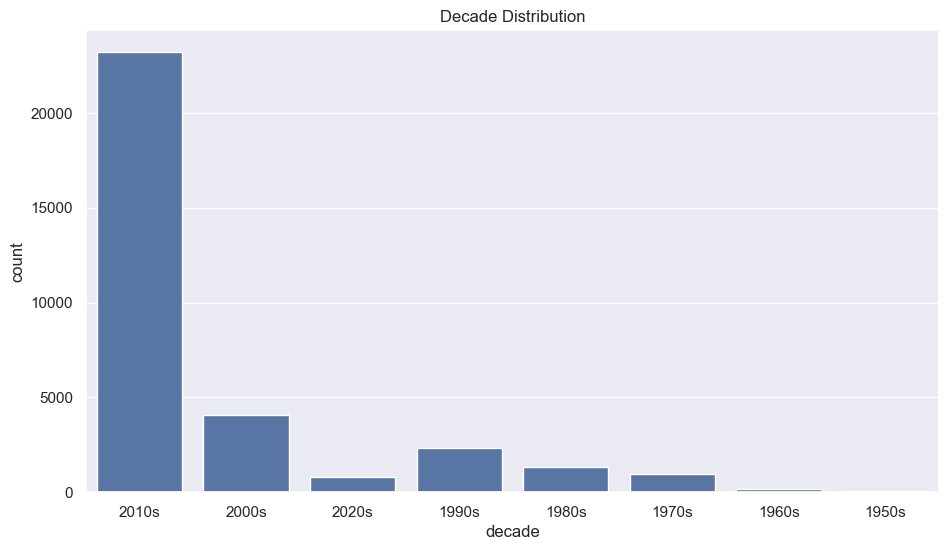

In [23]:
# Seaborn'un grafik ayarlarını yapın
sns.set(rc={'figure.figsize':(11,6)})

# countplot çizin
sns.countplot(x='decade', data=df)

# Grafik başlığını ekleyin
plt.title('Decade Distribution')

# Göster
plt.show()

In [21]:
df.head()

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name             playlist_id playlist_genre playlist_subgenre  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
4     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.748   0.916    6    -2.634     1        0.058         0.102   
1         0.726   0.815   11    -4.969     1        0.037         0.072   
2         0.675   0.931    1    -3.432     0        0.074         0.079   
3         0.718   0.930    7    -3.778     1        0.102         0.029   
4         0.650   0.833    1    -4.672     1        0.036         0.080   

   instrumentalness  liveness  valence   tempo  duration_ms decade  
0             0.000     0.065    0.518 122.036       194754  2010s  
1             0.004     0.357    0.693  99.972       162600  2010s  
2             0.000     0.110    0.613 124.008       176616  2010s  
3             0.000     0.204    0.277 121.956       169093  2010s  
4             0.000     0.083    0.725 123.976       189052  2010s

In [22]:
df.to_csv('/kaggle/working/ddt_dataset_final.csv', index=False)

### Let's make the 'genre' and 'sub_genre' columns numeric:

In [25]:
genres = df['playlist_genre'].unique()  #those are the genres in our data
genres

array(['pop', 'rap', 'rock', 'latin', 'r&b', 'edm'], dtype=object)

In [26]:
map_genres = {genre: i for i, genre in enumerate(genres)}
map_genres 

{'pop': 0, 'rap': 1, 'rock': 2, 'latin': 3, 'r&b': 4, 'edm': 5}

In [27]:
df['genre_numeric'] = df['playlist_genre'].map(map_genres)

In [28]:
subgenres = df['playlist_subgenre'].unique()  #those are the genres in our data
subgenres

array(['dance pop', 'post-teen pop', 'electropop', 'indie poptimism',
       'hip hop', 'southern hip hop', 'gangster rap', 'trap',
       'album rock', 'classic rock', 'permanent wave', 'hard rock',
       'tropical', 'latin pop', 'reggaeton', 'latin hip hop',
       'urban contemporary', 'hip pop', 'new jack swing', 'neo soul',
       'electro house', 'big room', 'pop edm',
       'progressive electro house'], dtype=object)

In [29]:
map_subgenres = {subgenre: i for i, subgenre in enumerate(subgenres)}
map_subgenres 

{'dance pop': 0,
 'post-teen pop': 1,
 'electropop': 2,
 'indie poptimism': 3,
 'hip hop': 4,
 'southern hip hop': 5,
 'gangster rap': 6,
 'trap': 7,
 'album rock': 8,
 'classic rock': 9,
 'permanent wave': 10,
 'hard rock': 11,
 'tropical': 12,
 'latin pop': 13,
 'reggaeton': 14,
 'latin hip hop': 15,
 'urban contemporary': 16,
 'hip pop': 17,
 'new jack swing': 18,
 'neo soul': 19,
 'electro house': 20,
 'big room': 21,
 'pop edm': 22,
 'progressive electro house': 23}

In [30]:
df = df.replace({
    "playlist_genre": map_genres,
    "playlist_subgenre": map_subgenres
})
df.tail()

C:\Users\ariel\AppData\Local\Temp\ipykernel_25852\1222896748.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({


track_id                            track_name  \
32828  7bxnKAamR3snQ1VGLuVfC1  City Of Lights - Official Radio Edit   
32829  5Aevni09Em4575077nkWHz   Closer - Sultan & Ned Shepard Remix   
32830  7ImMqPP3Q1yfUHvsdn7wEo          Sweet Surrender - Radio Edit   
32831  2m69mhnfQ1Oq6lGtXuYhgX        Only For You - Maor Levi Remix   
32832  29zWqhca3zt5NsckZqDf6c                Typhoon - Original Mix   

         track_artist  track_popularity          track_album_id  \
32828    Lush & Simon                42  2azRoBBWEEEYhqV6sb7JrT   
32829  Tegan and Sara                20  6kD6KLxj7s8eCE3ABvAyf5   
32830     Starkillers                14  0ltWNSY9JgxoIZO4VzuCa6   
32831          Mat Zo                15  1fGrOkHnHJcStl14zNx8Jy   
32832    Julian Calor                27  0X3mUOm6MhxR7PzxG95rAo   

                   track_album_name track_album_release_date    playlist_name  \
32828    City Of Lights (Vocal Mix)               2014-04-28  ♥ EDM LOVE 2020   
32829                Closer Remixed               2013-03-08  ♥ EDM LOVE 2020   
32830  Sweet Surrender (Radio Edit)               2014-04-21  ♥ EDM LOVE 2020   
32831        Only For You (Remixes)               2014-01-01  ♥ EDM LOVE 2020   
32832                 Typhoon/Storm               2014-03-03  ♥ EDM LOVE 2020   

                  playlist_id  playlist_genre  playlist_subgenre  \
32828  6jI1gFr6ANFtT8MmTvA2Ux               5                 23   
32829  6jI1gFr6ANFtT8MmTvA2Ux               5                 23   
32830  6jI1gFr6ANFtT8MmTvA2Ux               5                 23   
32831  6jI1gFr6ANFtT8MmTvA2Ux               5                 23   
32832  6jI1gFr6ANFtT8MmTvA2Ux               5                 23   

       danceability  energy  key  loudness  mode  speechiness  acousticness  \
32828         0.428   0.922    2    -1.814     1        0.094         0.077   
32829         0.522   0.786    0    -4.462     1        0.042         0.002   
32830         0.529   0.821    6    -4.899     0        0.048         0.108   
32831         0.626   0.888    2    -3.361     1        0.109         0.008   
32832         0.603   0.884    5    -4.571     0        0.038         0.000   

       instrumentalness  liveness  valence   tempo  duration_ms decade  \
32828             0.000     0.067    0.210 128.170       204375  2010s   
32829             0.004     0.375    0.400 128.041       353120  2010s   
32830             0.000     0.150    0.436 127.989       210112  2010s   
32831             0.127     0.343    0.308 128.008       367432  2010s   
32832             0.341     0.742    0.089 127.984       337500  2010s   

       genre_numeric  
32828              5  
32829              5  
32830              5  
32831              5  
32832              5

In [29]:
df_clean = df

In [30]:
df_clean.to_csv('/kaggle/working/ddt_genre.csv', index=False)

In [31]:
df['playlist_id'].unique().size #471 different playlist 

470

In [32]:
df.drop(["track_name","track_artist","track_album_name","playlist_name","track_album_release_date"], axis=1, inplace=True)
df.head()

track_id  track_popularity          track_album_id  \
0  6f807x0ima9a1j3VPbc7VN                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1  0r7CVbZTWZgbTCYdfa2P31                67  63rPSO264uRjW1X5E6cWv6   
2  1z1Hg7Vb0AhHDiEmnDE79l                70  1HoSmj2eLcsrR0vE9gThr4   
3  75FpbthrwQmzHlBJLuGdC7                60  1nqYsOef1yKKuGOVchbsk6   
4  1e8PAfcKUYoKkxPhrHqw4x                69  7m7vv9wlQ4i0LFuJiE2zsQ   

              playlist_id  playlist_genre  playlist_subgenre  danceability  \
0  37i9dQZF1DXcZDD7cfEKhW               0                  0         0.748   
1  37i9dQZF1DXcZDD7cfEKhW               0                  0         0.726   
2  37i9dQZF1DXcZDD7cfEKhW               0                  0         0.675   
3  37i9dQZF1DXcZDD7cfEKhW               0                  0         0.718   
4  37i9dQZF1DXcZDD7cfEKhW               0                  0         0.650   

   energy  key  loudness  mode  speechiness  acousticness  instrumentalness  \
0   0.916    6    -2.634     1        0.058         0.102             0.000   
1   0.815   11    -4.969     1        0.037         0.072             0.004   
2   0.931    1    -3.432     0        0.074         0.079             0.000   
3   0.930    7    -3.778     1        0.102         0.029             0.000   
4   0.833    1    -4.672     1        0.036         0.080             0.000   

   liveness  valence   tempo  duration_ms decade  genre_numeric  
0     0.065    0.518 122.036       194754  2010s              0  
1     0.357    0.693  99.972       162600  2010s              0  
2     0.110    0.613 124.008       176616  2010s              0  
3     0.204    0.277 121.956       169093  2010s              0  
4     0.083    0.725 123.976       189052  2010s              0

## Datalarda anlamsız olanları veya modelimizi olumsuz etkileyecek kayıtları silelim:

In [33]:
df[df['track_popularity'] == 0] #2698 records have popularity=0, these are meaningless for us

track_id  track_popularity          track_album_id  \
476    1gsb4CFzUMERAkfzAKwrZu                 0  75eIP5pPvtQCB0bAz2TEsU   
772    4yEXem27DzCg8xytvvO3E9                 0  2vb252Haz9iX4iOd7vP8kX   
801    7vHkU1H73z5NVbGTIyI1DG                 0  2vb252Haz9iX4iOd7vP8kX   
883    3decfgk2pFkvCzYUFj6ssf                 0  2FQCn5R6hSDeGYgUCW5kN9   
934    5KHbu2Go6NBryS0h0TpTNJ                 0  5aBI1WNIur9niQ5dM6xnVB   
...                       ...               ...                     ...   
32822  00UpV14MDfk4CvrMbFvqji                 0  52FeJmVsUJfoQybiwI5j9m   
32843  0UMGA0gqXYG4y5v7RspLMB                 0  5i5igXnpXZiVP07j9nVLhx   
32844  5v9dbmkGQmBYAnz1Xt8LwE                 0  5i5igXnpXZiVP07j9nVLhx   
32845  2deLBGKGAzEAX0DTayaCRa                 0  5i5igXnpXZiVP07j9nVLhx   
32846  74h1a99YlegQdRcSh4VESb                 0  5i5igXnpXZiVP07j9nVLhx   

                  playlist_id  playlist_genre  playlist_subgenre  \
476    37i9dQZF1DX4RDXswvP6Mj               0                  0   
772    50cXvxgMGrvoUeLhkzCyIO               0                  0   
801    50cXvxgMGrvoUeLhkzCyIO               0                  0   
883    37i9dQZF1DWUUPO0Sbx2CM               0                  0   
934    7eERKCkgNKCCx5GYdeMIZf               0                  0   
...                       ...             ...                ...   
32822  6jI1gFr6ANFtT8MmTvA2Ux               5                 23   
32843  3g8bHUAAs7CYNAhmrGKlqs               1                  7   
32844  3g8bHUAAs7CYNAhmrGKlqs               1                  7   
32845  3g8bHUAAs7CYNAhmrGKlqs               1                  7   
32846  3g8bHUAAs7CYNAhmrGKlqs               1                  7   

       danceability  energy  key  loudness  mode  speechiness  acousticness  \
476           0.605   0.894    9    -3.885     0        0.038         0.012   
772           0.716   0.981    0    -3.612     0        0.031         0.032   
801           0.705   0.975    6    -3.847     1        0.031         0.003   
883           0.559   0.844   11    -6.397     0        0.056         0.000   
934           0.498   0.723    7    -6.740     0        0.223         0.508   
...             ...     ...  ...       ...   ...          ...           ...   
32822         0.627   0.832    6    -5.525     0        0.048         0.009   
32843         0.805   0.453    5   -11.345     1        0.049         0.352   
32844         0.703   0.613    1    -5.035     0        0.170         0.110   
32845         0.672   0.519    8   -10.930     1        0.354         0.744   
32846         0.497   0.699    9    -5.956     0        0.247         0.702   

       instrumentalness  liveness  valence   tempo  duration_ms decade  \
476               0.000     0.089    0.545 122.051       197252  2010s   
772               0.007     0.171    0.861 139.047       215053  2000s   
801               0.000     0.537    0.969 129.934       209120  2000s   
883               0.001     0.169    0.357 127.995       205280  2010s   
934               0.001     0.419    0.318 110.024       248727  2010s   
...                 ...       ...      ...     ...          ...    ...   
32822             0.003     0.115    0.216 128.025       298125  2010s   
32843             0.000     0.103    0.370 104.962        73509  2000s   
32844             0.000     0.066    0.454  91.147       182465  2000s   
32845             0.000     0.112    0.549 170.246       159451  2000s   
32846             0.000     0.445    0.551 183.928        45062  2000s   

       genre_numeric  
476                0  
772                0  
801                0  
883                0  
934                0  
...              ...  
32822              5  
32843              1  
32844              1  
32845              1  
32846              1  

[2372 rows x 20 columns]

In [34]:
df = df[df['track_popularity'] != 0]
df[df['track_popularity'] == 0].size

0

In [35]:
df.head()

track_id  track_popularity          track_album_id  \
0  6f807x0ima9a1j3VPbc7VN                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1  0r7CVbZTWZgbTCYdfa2P31                67  63rPSO264uRjW1X5E6cWv6   
2  1z1Hg7Vb0AhHDiEmnDE79l                70  1HoSmj2eLcsrR0vE9gThr4   
3  75FpbthrwQmzHlBJLuGdC7                60  1nqYsOef1yKKuGOVchbsk6   
4  1e8PAfcKUYoKkxPhrHqw4x                69  7m7vv9wlQ4i0LFuJiE2zsQ   

              playlist_id  playlist_genre  playlist_subgenre  danceability  \
0  37i9dQZF1DXcZDD7cfEKhW               0                  0         0.748   
1  37i9dQZF1DXcZDD7cfEKhW               0                  0         0.726   
2  37i9dQZF1DXcZDD7cfEKhW               0                  0         0.675   
3  37i9dQZF1DXcZDD7cfEKhW               0                  0         0.718   
4  37i9dQZF1DXcZDD7cfEKhW               0                  0         0.650   

   energy  key  loudness  mode  speechiness  acousticness  instrumentalness  \
0   0.916    6    -2.634     1        0.058         0.102             0.000   
1   0.815   11    -4.969     1        0.037         0.072             0.004   
2   0.931    1    -3.432     0        0.074         0.079             0.000   
3   0.930    7    -3.778     1        0.102         0.029             0.000   
4   0.833    1    -4.672     1        0.036         0.080             0.000   

   liveness  valence   tempo  duration_ms decade  genre_numeric  
0     0.065    0.518 122.036       194754  2010s              0  
1     0.357    0.693  99.972       162600  2010s              0  
2     0.110    0.613 124.008       176616  2010s              0  
3     0.204    0.277 121.956       169093  2010s              0  
4     0.083    0.725 123.976       189052  2010s              0

# Encoding

## Label Encoding:

In [36]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]

for col in binary_cols:
    label_encoder(df, col)
        
df.head()

track_id  track_popularity          track_album_id  \
0  6f807x0ima9a1j3VPbc7VN                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1  0r7CVbZTWZgbTCYdfa2P31                67  63rPSO264uRjW1X5E6cWv6   
2  1z1Hg7Vb0AhHDiEmnDE79l                70  1HoSmj2eLcsrR0vE9gThr4   
3  75FpbthrwQmzHlBJLuGdC7                60  1nqYsOef1yKKuGOVchbsk6   
4  1e8PAfcKUYoKkxPhrHqw4x                69  7m7vv9wlQ4i0LFuJiE2zsQ   

              playlist_id  playlist_genre  playlist_subgenre  danceability  \
0  37i9dQZF1DXcZDD7cfEKhW               0                  0         0.748   
1  37i9dQZF1DXcZDD7cfEKhW               0                  0         0.726   
2  37i9dQZF1DXcZDD7cfEKhW               0                  0         0.675   
3  37i9dQZF1DXcZDD7cfEKhW               0                  0         0.718   
4  37i9dQZF1DXcZDD7cfEKhW               0                  0         0.650   

   energy  key  loudness  mode  speechiness  acousticness  instrumentalness  \
0   0.916    6    -2.634     1        0.058         0.102             0.000   
1   0.815   11    -4.969     1        0.037         0.072             0.004   
2   0.931    1    -3.432     0        0.074         0.079             0.000   
3   0.930    7    -3.778     1        0.102         0.029             0.000   
4   0.833    1    -4.672     1        0.036         0.080             0.000   

   liveness  valence   tempo  duration_ms decade  genre_numeric  
0     0.065    0.518 122.036       194754  2010s              0  
1     0.357    0.693  99.972       162600  2010s              0  
2     0.110    0.613 124.008       176616  2010s              0  
3     0.204    0.277 121.956       169093  2010s              0  
4     0.083    0.725 123.976       189052  2010s              0

In [37]:
from sklearn.preprocessing import LabelEncoder

# Creating LabelEncoder objects
track_id_encoder = LabelEncoder()
track_album_id_encoder = LabelEncoder()
playlist_id_encoder = LabelEncoder()
decade_encoder = LabelEncoder()

# Converting categorical IDs to numeric IDs
df['track_id_encoded'] = track_id_encoder.fit_transform(df['track_id'])
df['track_album_id_encoded'] = track_album_id_encoder.fit_transform(df['track_album_id'])
df['playlist_id_encoded'] = playlist_id_encoder.fit_transform(df['playlist_id'])
df['decade_encoder'] = decade_encoder.fit_transform(df['decade'])

df.head()

/tmp/ipykernel_18/2573296040.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['track_id_encoded'] = track_id_encoder.fit_transform(df['track_id'])
/tmp/ipykernel_18/2573296040.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['track_album_id_encoded'] = track_album_id_encoder.fit_transform(df['track_album_id'])
/tmp/ipykernel_18/2573296040.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

track_id  track_popularity          track_album_id  \
0  6f807x0ima9a1j3VPbc7VN                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1  0r7CVbZTWZgbTCYdfa2P31                67  63rPSO264uRjW1X5E6cWv6   
2  1z1Hg7Vb0AhHDiEmnDE79l                70  1HoSmj2eLcsrR0vE9gThr4   
3  75FpbthrwQmzHlBJLuGdC7                60  1nqYsOef1yKKuGOVchbsk6   
4  1e8PAfcKUYoKkxPhrHqw4x                69  7m7vv9wlQ4i0LFuJiE2zsQ   

              playlist_id  playlist_genre  playlist_subgenre  danceability  \
0  37i9dQZF1DXcZDD7cfEKhW               0                  0         0.748   
1  37i9dQZF1DXcZDD7cfEKhW               0                  0         0.726   
2  37i9dQZF1DXcZDD7cfEKhW               0                  0         0.675   
3  37i9dQZF1DXcZDD7cfEKhW               0                  0         0.718   
4  37i9dQZF1DXcZDD7cfEKhW               0                  0         0.650   

   energy  key  loudness  mode  speechiness  acousticness  instrumentalness  \
0   0.916    6    -2.634     1        0.058         0.102             0.000   
1   0.815   11    -4.969     1        0.037         0.072             0.004   
2   0.931    1    -3.432     0        0.074         0.079             0.000   
3   0.930    7    -3.778     1        0.102         0.029             0.000   
4   0.833    1    -4.672     1        0.036         0.080             0.000   

   liveness  valence   tempo  duration_ms decade  genre_numeric  \
0     0.065    0.518 122.036       194754  2010s              0   
1     0.357    0.693  99.972       162600  2010s              0   
2     0.110    0.613 124.008       176616  2010s              0   
3     0.204    0.277 121.956       169093  2010s              0   
4     0.083    0.725 123.976       189052  2010s              0   

   track_id_encoded  track_album_id_encoded  playlist_id_encoded  \
0             20297                    7083                  233   
1              2560                   15229                  233   
2              6023                    3248                  233   
3             21620                    4560                  233   
4              4984                   18937                  233   

   decade_encoder  
0               6  
1               6  
2               6  
3               6  
4               6

In [38]:
df_labelencode = df[["track_id","track_album_id","playlist_id","track_id_encoded","track_album_id_encoded","playlist_id_encoded"]]
df_labelencode.head()

track_id          track_album_id             playlist_id  \
0  6f807x0ima9a1j3VPbc7VN  2oCs0DGTsRO98Gh5ZSl2Cx  37i9dQZF1DXcZDD7cfEKhW   
1  0r7CVbZTWZgbTCYdfa2P31  63rPSO264uRjW1X5E6cWv6  37i9dQZF1DXcZDD7cfEKhW   
2  1z1Hg7Vb0AhHDiEmnDE79l  1HoSmj2eLcsrR0vE9gThr4  37i9dQZF1DXcZDD7cfEKhW   
3  75FpbthrwQmzHlBJLuGdC7  1nqYsOef1yKKuGOVchbsk6  37i9dQZF1DXcZDD7cfEKhW   
4  1e8PAfcKUYoKkxPhrHqw4x  7m7vv9wlQ4i0LFuJiE2zsQ  37i9dQZF1DXcZDD7cfEKhW   

   track_id_encoded  track_album_id_encoded  playlist_id_encoded  
0             20297                    7083                  233  
1              2560                   15229                  233  
2              6023                    3248                  233  
3             21620                    4560                  233  
4              4984                   18937                  233

In [39]:
# Let's delete the columns except those with IDs:

df.drop(["track_id","track_album_id","playlist_id","decade"], axis=1, inplace=True)
df.tail()

/tmp/ipykernel_18/251592257.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["track_id","track_album_id","playlist_id","decade"], axis=1, inplace=True)


track_popularity  playlist_genre  playlist_subgenre  danceability  \
32839                 2               1                  7         0.770   
32840                 4               1                  7         0.609   
32841                 1               1                  7         0.410   
32842                 1               1                  7         0.777   
32847                 8               1                  7         0.837   

       energy  key  loudness  mode  speechiness  acousticness  \
32839   0.715    6    -7.973     1        0.273         0.716   
32840   0.668    0   -10.112     1        0.315         0.357   
32841   0.607    2   -10.758     1        0.290         0.849   
32842   0.643    0    -3.998     1        0.220         0.096   
32847   0.414    2   -11.627     1        0.240         0.582   

       instrumentalness  liveness  valence   tempo  duration_ms  \
32839             0.000     0.097    0.519  92.981       235807   
32840             0.000     0.058    0.735 159.976       168072   
32841             0.000     0.088    0.362  90.012       151625   
32842             0.000     0.113    0.110  90.016       305450   
32847             0.000     0.133    0.413 139.990       109908   

       genre_numeric  track_id_encoded  track_album_id_encoded  \
32839              1              8094                      25   
32840              1              3110                   14348   
32841              1              8129                   14348   
32842              1             11445                   14348   
32847              1             11963                    9052   

       playlist_id_encoded  decade_encoder  
32839                  266               5  
32840                  266               5  
32841                  266               5  
32842                  266               5  
32847                  266               7

# Content-Based Filtering

In [40]:
from sklearn.metrics.pairwise import cosine_similarity

# Creating feature vectors (here we use genre and popularity, but you can add more)
features = df[['playlist_genre', 'energy','playlist_subgenre','danceability']]
features = features.to_numpy()

# Calculating similarity between songs using cosine similarity
similarity_matrix = cosine_similarity(features)

# Recommending songs similar to a specific song (for example, the song with song_id=1)
song_index = 0 # Index of the song with song_id=1
similar_songs = similarity_matrix[song_index]

# Ranking by similarity score and recommending the top 3 most similar songs
recommended_song_indices = np.argsort(similar_songs)[::-1][1:4]
recommended_songs = df.iloc[recommended_song_indices]

print(recommended_songs)

      track_popularity  playlist_genre  playlist_subgenre  danceability  \
365                 68               0                  0         0.708   
1170                46               0                  0         0.646   
1262                75               0                  0         0.733   

      energy  key  loudness  mode  speechiness  acousticness  \
365    0.868    6    -3.287     1        0.043         0.031   
1170   0.792    1    -5.679     0        0.066         0.011   
1262   0.899    0    -4.237     1        0.143         0.005   

      instrumentalness  liveness  valence   tempo  duration_ms  genre_numeric  \
365              0.000     0.122    0.720 124.994       202999              0   
1170             0.000     0.587    0.370 105.052       148986              0   
1262             0.000     0.372    0.760 127.086       236093              0   

      track_id_encoded  track_album_id_encoded  playlist_id_encoded  \
365              11426                    5140

In [41]:
# Create a DataFrame containing the IDs of the recommended songs (continuing from the end of the example code)
recommended_song_ids = pd.DataFrame({'track_id_encoded': recommended_songs['track_id_encoded']})

# Merge the recommended song IDs with df_tracks to retrieve song names and artist names
recommended_song_id = pd.merge(recommended_song_ids, df_labelencode, on='track_id_encoded', how='left')

# Merge the recommended song IDs with df_tracks to retrieve song names and artist names
recommended_song_details = pd.merge(recommended_song_id, df_tracks, on='track_id', how='left')

recommended_song_details[["track_id", "track_name", "track_artist", "track_album_name"]].drop_duplicates(subset=['track_id'])

track_id                    track_name track_artist  \
0  3kGfazcbVvVkuZunzlLgTD            Came Here for Love       Sigala   
1  0TrIO6sENZNH0yYGhNyLdK  One Thing Right - Koni Remix   Marshmello   
2  1uXbwHHfgsXcUKfSZw5ZJ0         Run the World (Girls)      Beyoncé   

                  track_album_name  
0               Came Here for Love  
1  One Thing Right (Remixes Pt. 2)  
2                                4

In [42]:
def check_df(dataframe, head=5):
    print('##################### Shape #####################')
    print(dataframe.shape)
    print('##################### Types #####################')
    print(dataframe.dtypes)
    print('######################## Head ########################')
    print(dataframe.head(head))
    print('################## Missing Values ##################')
    print(dataframe.isnull().sum())

check_df(df)

##################### Shape #####################
(23855, 20)
##################### Types #####################
track_popularity            int64
playlist_genre              int64
playlist_subgenre           int64
danceability              float64
energy                    float64
key                         int64
loudness                  float64
mode                        int64
speechiness               float64
acousticness              float64
instrumentalness          float64
liveness                  float64
valence                   float64
tempo                     float64
duration_ms                 int64
genre_numeric               int64
track_id_encoded            int64
track_album_id_encoded      int64
playlist_id_encoded         int64
decade_encoder              int64
dtype: object
######################## Head ########################
   track_popularity  playlist_genre  playlist_subgenre  danceability  energy  \
0                66               0                  0     

# Min-Max Scaling

In [43]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Select features for scaling:
features = df[['playlist_genre', 'track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

# Initialize Min-Max Scaler and apply it to the features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Convert the scaled features back to the DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# Check the results by showing the first five rows
print(scaled_df.head())


   playlist_genre  track_popularity  danceability  energy   key  loudness  \
0           0.000             0.670         0.734   0.916 0.545     0.858   
1           0.000             0.680         0.709   0.814 1.000     0.773   
2           0.000             0.711         0.652   0.931 0.091     0.829   
3           0.000             0.608         0.700   0.930 0.636     0.817   
4           0.000             0.701         0.624   0.832 0.091     0.784   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  tempo  
0 1.000        0.040         0.103             0.000     0.057    0.509  0.424  
1 1.000        0.017         0.073             0.004     0.352    0.691  0.316  
2 0.000        0.058         0.080             0.000     0.102    0.608  0.434  
3 1.000        0.089         0.029             0.000     0.197    0.259  0.424  
4 1.000        0.015         0.081             0.000     0.075    0.724  0.434  


# cosine_similarity

In [44]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity
cosine_sim = cosine_similarity(scaled_df)

# Convert the cosine similarity matrix into a DataFrame
cosine_sim_df = pd.DataFrame(cosine_sim, index=df['track_id_encoded'], columns=df['track_id_encoded'])

# Check the similarity matrix by showing the first five rows
# Check the similarity matrix by showing the first five rows
def show_partial_dataframe(df, rows=5):
    return df.head(rows)

show_partial_dataframe(cosine_sim_df, rows=3)

track_id_encoded  20297  2560   6023   21620  4984   22782  7216   20099  \
track_id_encoded                                                           
20297             1.000  0.963  0.846  0.988  0.967  0.992  0.843  0.862   
2560              0.963  1.000  0.780  0.962  0.901  0.983  0.811  0.817   
6023              0.846  0.780  1.000  0.807  0.859  0.824  0.923  0.972   

track_id_encoded  22554  3951   11131  11340  20245  11133  15494  3742   \
track_id_encoded                                                           
20297             0.952  0.982  0.987  0.975  0.955  0.854  0.864  0.947   
2560              0.966  0.919  0.966  0.965  0.910  0.853  0.825  0.890   
6023              0.786  0.852  0.837  0.765  0.845  0.966  0.947  0.858   

track_id_encoded  16781  10574  834    8832   13411  9713   5393   8906   \
track_id_encoded                                                           
20297             0.825  0.849  0.958  0.966  0.856  0.862  0.868  0.972   
2560              0.775  0.882  0.886  0.944  0.826  0.877  0.825  0.887   
6023              0.970  0.885  0.796  0.735  0.931  0.924  0.971  0.840   

track_id_encoded  14902  17175  7116   6060   13306  5166   4798   13843  \
track_id_encoded                                                           
20297             0.959  0.961  0.844  0.784  0.994  0.941  0.956  0.817   
2560              0.988  0.992  0.761  0.728  0.956  0.889  0.983  0.763   
6023              0.757  0.751  0.986  0.913  0.822  0.831  0.749  0.978   

track_id_encoded  782    21866  23276  14879  15251  22103  20676  16757  \
track_id_encoded                                                           
20297             0.971  0.952  0.978  0.954  0.986  0.810  0.979  0.846   
2560              0.989  0.888  0.981  0.894  0.956  0.766  0.911  0.881   
6023              0.774  0.857  0.772  0.854  0.845  0.978  0.843  0.879   

track_id_encoded  17900  20788  8776   12068  12508  9686   8316   21839  \
track_id_encoded                                                           
20297             0.990  0.977  0.861  0.891  0.840  0.922  0.851  0.996   
2560              0.961  0.971  0.822  0.831  0.755  0.887  0.873  0.967   
6023              0.836  0.782  0.992  0.770  0.976  0.758  0.886  0.827   

track_id_encoded  18808  428    3593   17857  11437  17763  10202  7883   \
track_id_encoded                                                           
20297             0.869  0.868  0.835  0.797  0.983  0.846  0.853  0.833   
2560              0.855  0.824  0.754  0.717  0.950  0.866  0.795  0.799   
6023              0.967  0.979  0.991  0.925  0.798  0.868  0.961  0.906   

track_id_encoded  11904  5585   16592  21174  18954  13484  5494   14199  \
track_id_encoded                                                           
20297             0.821  0.931  0.874  0.855  0.862  0.861  0.841  0.856   
2560              0.759  0.923  0.855  0.820  0.851  0.868  0.782  0.843   
6023              0.987  0.685  0.957  0.986  0.933  0.921  0.988  0.943   

track_id_encoded  18787  11881  13410  19316  6424   18816  250    2531   \
track_id_encoded                                                           
20297             0.980  0.863  0.954  0.990  0.969  0.870  0.964  0.979   
2560              0.920  0.824  0.975  0.974  0.940  0.853  0.976  0.972   
6023              0.842  0.974  0.781  0.795  0.752  0.959  0.756  0.809   

track_id_encoded  17390  19067  13391  16449  12965  16902  11935  21196  \
track_id_encoded                                                           
20297             0.836  0.983  0.985  0.980  0.941  0.955  0.987  0.945   
2560              0.811  0.963  0.973  0.976  0.847  0.883  0.962  0.906   
6023              0.911  0.831  0.811  0.812  0.809  0.859  0.836  0.726   

track_id_encoded  10317  13284  5939   6024   20090  17931  3420   9731   \
track_id_encoded                                                           
20297             0.871  0.953  0.781 

In [45]:
# First, retrieve all similarity scores for the relevant 'track_id_encoded':
similarities = cosine_sim_df.loc[6561]

# Now, sort the similarity values and display the lowest scores (the least similar ones)
# Use ascending=True to get the lowest values (those closest to 0)
# To display the least similar ones, we can select the first few excluding itself
least_similar = similarities.sort_values(ascending=True).drop(6561, errors='ignore')[:5]

print(least_similar)


track_id_encoded
7675    0.338
10457   0.341
21234   0.362
22043   0.368
22380   0.377
Name: 6561, dtype: float64


In [46]:
print(cosine_sim_df.loc[4983])


track_id_encoded
20297   0.848
2560    0.831
6023    0.931
21620   0.830
4984    0.796
         ... 
8094    0.739
3110    0.690
8129    0.622
11445   0.639
11963   0.687
Name: 4983, Length: 23855, dtype: float64


In [47]:
df_labelencode[df_labelencode['track_id_encoded'] == 6561] 

track_id          track_album_id             playlist_id  \
22017  29zBeRiLVnkDEj7tvmLVOU  7MfUiQkVEDkOSmU83A2C9q  1ZlL3IQS8eB0s0RMxz02yD   

       track_id_encoded  track_album_id_encoded  playlist_id_encoded  
22017              6561                   18425                   75

In [48]:
df_labelencode.tail()


track_id          track_album_id             playlist_id  \
32839  2fgCGyzscJh23L98xLQfHA  00Up6Iyx9sfgpPPPfdF0Wo  3g8bHUAAs7CYNAhmrGKlqs   
32840  12Ue9Y3hF9DIG2OTYF4r8g  5i5igXnpXZiVP07j9nVLhx  3g8bHUAAs7CYNAhmrGKlqs   
32841  2gHPDyFYTJG68J3FaDGTwV  5i5igXnpXZiVP07j9nVLhx  3g8bHUAAs7CYNAhmrGKlqs   
32842  3kxIBwKWOf2zxHF2Ifoa53  5i5igXnpXZiVP07j9nVLhx  3g8bHUAAs7CYNAhmrGKlqs   
32847  3vx9E57pL0lY8x8WFlTS5b  3b5OH6HyDn6p31DHc5adsw  3g8bHUAAs7CYNAhmrGKlqs   

       track_id_encoded  track_album_id_encoded  playlist_id_encoded  
32839              8094                      25                  266  
32840              3110                   14348                  266  
32841              8129                   14348                  266  
32842             11445                   14348                  266  
32847             11963                    9052                  266

In [49]:
# Merging operation on the main DataFrame 'df' and the second DataFrame 'df_labelencode
df_merged = pd.merge(df, df_labelencode[['track_id_encoded', 'track_id']], on='track_id_encoded', how='left')

# Check the 'df_merged' DataFrame
print(df_merged)

       track_popularity  playlist_genre  playlist_subgenre  danceability  \
0                    66               0                  0         0.748   
1                    67               0                  0         0.726   
2                    70               0                  0         0.675   
3                    60               0                  0         0.718   
4                    69               0                  0         0.650   
...                 ...             ...                ...           ...   
23850                 2               1                  7         0.770   
23851                 4               1                  7         0.609   
23852                 1               1                  7         0.410   
23853                 1               1                  7         0.777   
23854                 8               1                  7         0.837   

       energy  key  loudness  mode  speechiness  acousticness  \
0       0.916    6    

In [50]:
df_merged.to_csv('/kaggle/working/ddt_dataset_merged.csv', index=False)

In [51]:
# Convert this matrix into a pandas DataFrame
cosine_sim_df = pd.DataFrame(cosine_sim, index=df['track_id_encoded'], columns=df['track_id_encoded'])

def split_track_and_score(top_track_tuple):
    """Her tuple içerisindeki track_id ve score değerlerini ayır."""
    return top_track_tuple[0], top_track_tuple[1]

def get_top_matches(df, n_matches=3):
    top_matches = {}
    for index, row in df.iterrows():
        np.fill_diagonal(cosine_sim, 0)
        top_indices = row.nlargest(n_matches + 1).index
        top_values = row.nlargest(n_matches + 1).values
        top_indices = top_indices[1:] # Kendi indeksini atla
        top_values = top_values[1:] # Kendi değerini atla
        top_matches[index] = list(zip(top_indices, top_values))

    top_matches_df = pd.DataFrame(top_matches).T
    top_matches_df.columns = [f"Top_{i+1}_Track" for i in range(n_matches)]
    
    # Process each column individually
    for i in range(n_matches):
        track_ids, scores = zip(*top_matches_df[f'Top_{i+1}_Track'].apply(split_track_and_score))
        top_matches_df[f'Top_{i+1}_Track_ID'] = track_ids
        top_matches_df[f'Top_{i+1}_Score'] = scores
    
    # Remove the original columns
    top_matches_df.drop(columns=[f'Top_{i+1}_Track' for i in range(n_matches)], inplace=True)
    
    top_matches_df = top_matches_df.reset_index()
    top_matches_df = top_matches_df.rename(columns={'index': 'Track_ID'})
    
    return top_matches_df

# Call the function and retrieve the new DataFrame
top_matches_df = get_top_matches(cosine_sim_df)

# Print the new DataFrame
print(top_matches_df.head())

   Track_ID  Top_1_Track_ID  Top_1_Score  Top_2_Track_ID  Top_2_Score  \
0     20297             827        0.997            2205        0.997   
1      2560            4040        0.995            1289        0.994   
2      6023           17210        0.997            5637        0.997   
3     21620            5300        0.995           18398        0.995   
4      4984            4628        0.997           20010        0.997   

   Top_3_Track_ID  Top_3_Score  
0           13805        0.997  
1           12473        0.994  
2           19147        0.997  
3              35        0.995  
4            7065        0.997  


In [52]:
# Merge the 'df_labelencode' and 'df_tracks' DataFrames on 'track_id_encoded
merged_df = pd.merge(df_labelencode[['track_id', 'track_id_encoded']],
                     df_tracks[['track_id', 'track_name']],
                     on='track_id',
                     how='left')

# Print the new DataFrame containing the desired columns
print(merged_df[['track_id', 'track_name', 'track_id_encoded']])


                     track_id  \
0      6f807x0ima9a1j3VPbc7VN   
1      0r7CVbZTWZgbTCYdfa2P31   
2      1z1Hg7Vb0AhHDiEmnDE79l   
3      75FpbthrwQmzHlBJLuGdC7   
4      1e8PAfcKUYoKkxPhrHqw4x   
...                       ...   
23850  2fgCGyzscJh23L98xLQfHA   
23851  12Ue9Y3hF9DIG2OTYF4r8g   
23852  2gHPDyFYTJG68J3FaDGTwV   
23853  3kxIBwKWOf2zxHF2Ifoa53   
23854  3vx9E57pL0lY8x8WFlTS5b   

                                              track_name  track_id_encoded  
0      I Don't Care (with Justin Bieber) - Loud Luxur...             20297  
1                        Memories - Dillon Francis Remix              2560  
2                        All the Time - Don Diablo Remix              6023  
3                      Call You Mine - Keanu Silva Remix             21620  
4                Someone You Loved - Future Humans Remix              4984  
...                                                  ...               ...  
23850                                        Canli Bomba        

In [53]:
top_matches_df.head()

Track_ID  Top_1_Track_ID  Top_1_Score  Top_2_Track_ID  Top_2_Score  \
0     20297             827        0.997            2205        0.997   
1      2560            4040        0.995            1289        0.994   
2      6023           17210        0.997            5637        0.997   
3     21620            5300        0.995           18398        0.995   
4      4984            4628        0.997           20010        0.997   

   Top_3_Track_ID  Top_3_Score  
0           13805        0.997  
1           12473        0.994  
2           19147        0.997  
3              35        0.995  
4            7065        0.997

In [54]:
final_df = top_matches_df.merge(merged_df[['track_id_encoded','track_id', 'track_name']], left_on='Track_ID', right_on='track_id_encoded', how='left')

# Print the result DataFrame:
print(final_df.head())


   Track_ID  Top_1_Track_ID  Top_1_Score  Top_2_Track_ID  Top_2_Score  \
0     20297             827        0.997            2205        0.997   
1      2560            4040        0.995            1289        0.994   
2      6023           17210        0.997            5637        0.997   
3     21620            5300        0.995           18398        0.995   
4      4984            4628        0.997           20010        0.997   

   Top_3_Track_ID  Top_3_Score  track_id_encoded                track_id  \
0           13805        0.997             20297  6f807x0ima9a1j3VPbc7VN   
1           12473        0.994              2560  0r7CVbZTWZgbTCYdfa2P31   
2           19147        0.997              6023  1z1Hg7Vb0AhHDiEmnDE79l   
3              35        0.995             21620  75FpbthrwQmzHlBJLuGdC7   
4            7065        0.997              4984  1e8PAfcKUYoKkxPhrHqw4x   

                                          track_name  
0  I Don't Care (with Justin Bieber) - Loud Luxur

In [55]:
df_merged.to_csv('/kaggle/working/ddt_dataset_final.csv', index=False)

In [56]:
for i in range(1, 4):
    # Use the relevant Top_X_Track_ID column and the track_name column for the merging operation:
    final_df = final_df.merge(
        merged_df[['track_id_encoded', 'track_id']],
        left_on=f'Top_{i}_Track_ID',
        right_on='track_id_encoded',
        how='left',
        suffixes=('', f'_Top{i}')
    )
    
    # Update the newly created track_name column with a more meaningful name:
    final_df.rename(columns={f'track_name_Top{i}': f'Track_Name_Top{i}'}, inplace=True)

# Remove the now unnecessary track_id_encoded columns:
final_df.drop(columns=['track_id_encoded'], inplace=True)

# Print the resulting DataFrame:
print(final_df.head())

   Track_ID  Top_1_Track_ID  Top_1_Score  Top_2_Track_ID  Top_2_Score  \
0     20297             827        0.997            2205        0.997   
1      2560            4040        0.995            1289        0.994   
2      6023           17210        0.997            5637        0.997   
3     21620            5300        0.995           18398        0.995   
4      4984            4628        0.997           20010        0.997   

   Top_3_Track_ID  Top_3_Score                track_id  \
0           13805        0.997  6f807x0ima9a1j3VPbc7VN   
1           12473        0.994  0r7CVbZTWZgbTCYdfa2P31   
2           19147        0.997  1z1Hg7Vb0AhHDiEmnDE79l   
3              35        0.995  75FpbthrwQmzHlBJLuGdC7   
4            7065        0.997  1e8PAfcKUYoKkxPhrHqw4x   

                                          track_name  track_id_encoded_Top1  \
0  I Don't Care (with Justin Bieber) - Loud Luxur...                    827   
1                    Memories - Dillon Francis Remix  

In [57]:
# Drop the columns track_id_encoded_Top1, track_id_encoded_Top2, and track_id_encoded_Top3
final_df.drop(['track_id_encoded_Top1', 'track_id_encoded_Top2', 'track_id_encoded_Top3'], axis=1, inplace=True)

# Print the resulting DataFrame
print(final_df.head())

   Track_ID  Top_1_Track_ID  Top_1_Score  Top_2_Track_ID  Top_2_Score  \
0     20297             827        0.997            2205        0.997   
1      2560            4040        0.995            1289        0.994   
2      6023           17210        0.997            5637        0.997   
3     21620            5300        0.995           18398        0.995   
4      4984            4628        0.997           20010        0.997   

   Top_3_Track_ID  Top_3_Score                track_id  \
0           13805        0.997  6f807x0ima9a1j3VPbc7VN   
1           12473        0.994  0r7CVbZTWZgbTCYdfa2P31   
2           19147        0.997  1z1Hg7Vb0AhHDiEmnDE79l   
3              35        0.995  75FpbthrwQmzHlBJLuGdC7   
4            7065        0.997  1e8PAfcKUYoKkxPhrHqw4x   

                                          track_name           track_id_Top1  \
0  I Don't Care (with Justin Bieber) - Loud Luxur...  0GRoERSBBky3YgdKW2w2Vc   
1                    Memories - Dillon Francis Remix

In [58]:
final_df[['track_id', 'track_name', 'track_id_Top1','Top_1_Score', 'track_id_Top2','Top_2_Score', 'track_id_Top2','Top_2_Score']]

track_id  \
0      6f807x0ima9a1j3VPbc7VN   
1      0r7CVbZTWZgbTCYdfa2P31   
2      1z1Hg7Vb0AhHDiEmnDE79l   
3      75FpbthrwQmzHlBJLuGdC7   
4      1e8PAfcKUYoKkxPhrHqw4x   
...                       ...   
23850  2fgCGyzscJh23L98xLQfHA   
23851  12Ue9Y3hF9DIG2OTYF4r8g   
23852  2gHPDyFYTJG68J3FaDGTwV   
23853  3kxIBwKWOf2zxHF2Ifoa53   
23854  3vx9E57pL0lY8x8WFlTS5b   

                                              track_name  \
0      I Don't Care (with Justin Bieber) - Loud Luxur...   
1                        Memories - Dillon Francis Remix   
2                        All the Time - Don Diablo Remix   
3                      Call You Mine - Keanu Silva Remix   
4                Someone You Loved - Future Humans Remix   
...                                                  ...   
23850                                        Canli Bomba   
23851                                  Sikinti Misafirim   
23852                                Filmi Geriye Sarmak   
23853                                  Sorunlu Bir Track   
23854                                        Kuruyan Tuz   

                track_id_Top1  Top_1_Score           track_id_Top2  \
0      0GRoERSBBky3YgdKW2w2Vc        0.997  0jlpHhGUFn4aAWLsRRnwep   
1      1Jwc3ODLQxtbnS8M9TflSP        0.995  0QVAlchLCx15ZLSoR9Wg1B   
2      5ecZWU5uQOiCVSnPxBZNmT        0.997  1r1fPuhj9H4VdXr7OK6FL5   
3      1kQhi22kyluRCnIPAXtxEZ        0.995  635mzxhITS1xY3AVSLKgyD   
4      1WkMMavIMc4JZ8cfMmxHkI        0.997  6Z8R6UsFuGXGtiIxiD8ISb   
...                       ...          ...                     ...   
23850  0QQNA8bZqefrGfsShzlZkb        0.981  0NokbnjZEEpLrFjpvanGF4   
23851  6SN1WX0OVZP2TRMnqfggVx        0.985  1D7FQQfKf4o3Xd2QTm1441   
23852  6GzM9lH9GJXY3pJt3BWNjF        0.956  38J1ihEp0kRsuRboyoKXhN   
23853  2qqwaTbY2FwR6SBWMbHcU0        0.983  4WstRtdgYjwPvpCekgYAhs   
23854  5TTOE0AG2peRUOE5iNdLXO        0.985  49VSioK272TASR4r9vRTuP   

       Top_2_Score           track_id_Top2  Top_2_Score  
0            0.997  0jlpHhGUFn4aAWLsRRnwep        0.997  
1            0.994  0QVAlchLCx15ZLSoR9Wg1B        0.994  
2            0.997  1r1fPuhj9H4VdXr7OK6FL5        0.997  
3            0.995  635mzxhITS1xY3AVSLKgyD        0.995  
4            0.997  6Z8R6UsFuGXGtiIxiD8ISb        0.997  
...            ...                     ...          ...  
23850        0.979  0NokbnjZEEpLrFjpvanGF4        0.979  
23851        0.985  1D7FQQfKf4o3Xd2QTm1441        0.985  
23852        0.955  38J1ihEp0kRsuRboyoKXhN        0.955  
23853        0.982  4WstRtdgYjwPvpCekgYAhs        0.982  
23854        0.980  49VSioK272TASR4r9vRTuP        0.980  

[23855 rows x 8 columns]

In [59]:
final_df.to_csv('/kaggle/working/ddt_df_final2.csv', index=False)

In [60]:
final_df[final_df['track_id']=='0cIadtlc6acyPFeWcSJlDg']

Track_ID  Top_1_Track_ID  Top_1_Score  Top_2_Track_ID  Top_2_Score  \
15518      1876            3162        0.997           21409        0.996   

       Top_3_Track_ID  Top_3_Score                track_id  \
15518           19478        0.995  0cIadtlc6acyPFeWcSJlDg   

                            track_name           track_id_Top1  \
15518  Magalenha (feat. Sergio Mendes)  13REzt8iuHA4V7HXk4eIEa   

                track_id_Top2           track_id_Top3  
15518  717F7aaPBGVz777aXLiGP9  6OKaib6HaebKVCL5VOoIGR

<div style="text-align: center; border-radius: 10px; border: solid #484366; padding: 15px; background-color: #FFECC3; font-size: 140%;">
    Thank you for taking the time to review my work 📝<br><br> 🌟 Your feedback, comments, and likes are invaluable to me as they help improve and refine this project further<br><br>Please feel free to share your thoughts and suggestions 💭💬
</div>
